In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import os
# Add the parent directory to sys.path to allow imports from my_project
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from my_project.dataset import HousePricingDataModule


In [2]:
dataModule = HousePricingDataModule()
dataModule.setup('fit')
train_df = dataModule.train_dataloader()

train_df.dataset

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,0.891313,-1.376391,1.238688,1.270707,1.175831,-1.214614,-0.555229,1.020008
1,-0.473538,-0.661382,-1.202076,-0.998125,-1.708519,0.004062,-1.239290,-0.805075
2,-0.271968,-1.376391,1.238688,1.029342,-0.949502,-1.214614,1.496953,-0.281750
3,0.066412,-1.376391,-1.202076,0.401792,0.778210,0.004062,-0.213199,-0.018299
4,-0.905822,0.053626,-1.202076,-1.336036,-0.375051,1.222739,-1.239290,-1.067900
...,...,...,...,...,...,...,...,...
595,1.100978,-1.376391,0.018306,0.112154,1.135067,0.004062,-0.555229,1.109040
596,-0.904203,1.483642,0.018306,1.656891,1.043101,1.222739,1.154922,-0.540960
597,-1.167297,0.053626,-1.202076,-1.480855,0.587880,0.004062,-0.213199,-1.277162
598,1.457167,-0.661382,0.018306,0.015608,-0.167373,-1.214614,0.128831,1.315363


In [3]:
# load the CSV from data/raw (uses pandas and os already imported in the notebook)
df = pd.read_csv('../data/raw/house_price_regression_dataset.csv')
df.head()

# optionally extract features/target if column is named 'House_Price'
X = df.drop(columns=['House_Price'])
y = df['House_Price']
print(X.shape, y.shape)
X.head()

(1000, 7) (1000,)


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality
0,1360,2,1,1981,0.599637,0,5
1,4272,3,3,2016,4.753014,1,6
2,3592,1,2,2016,3.634823,0,9
3,966,1,2,1977,2.730667,1,8
4,4926,2,1,1993,4.699073,0,8


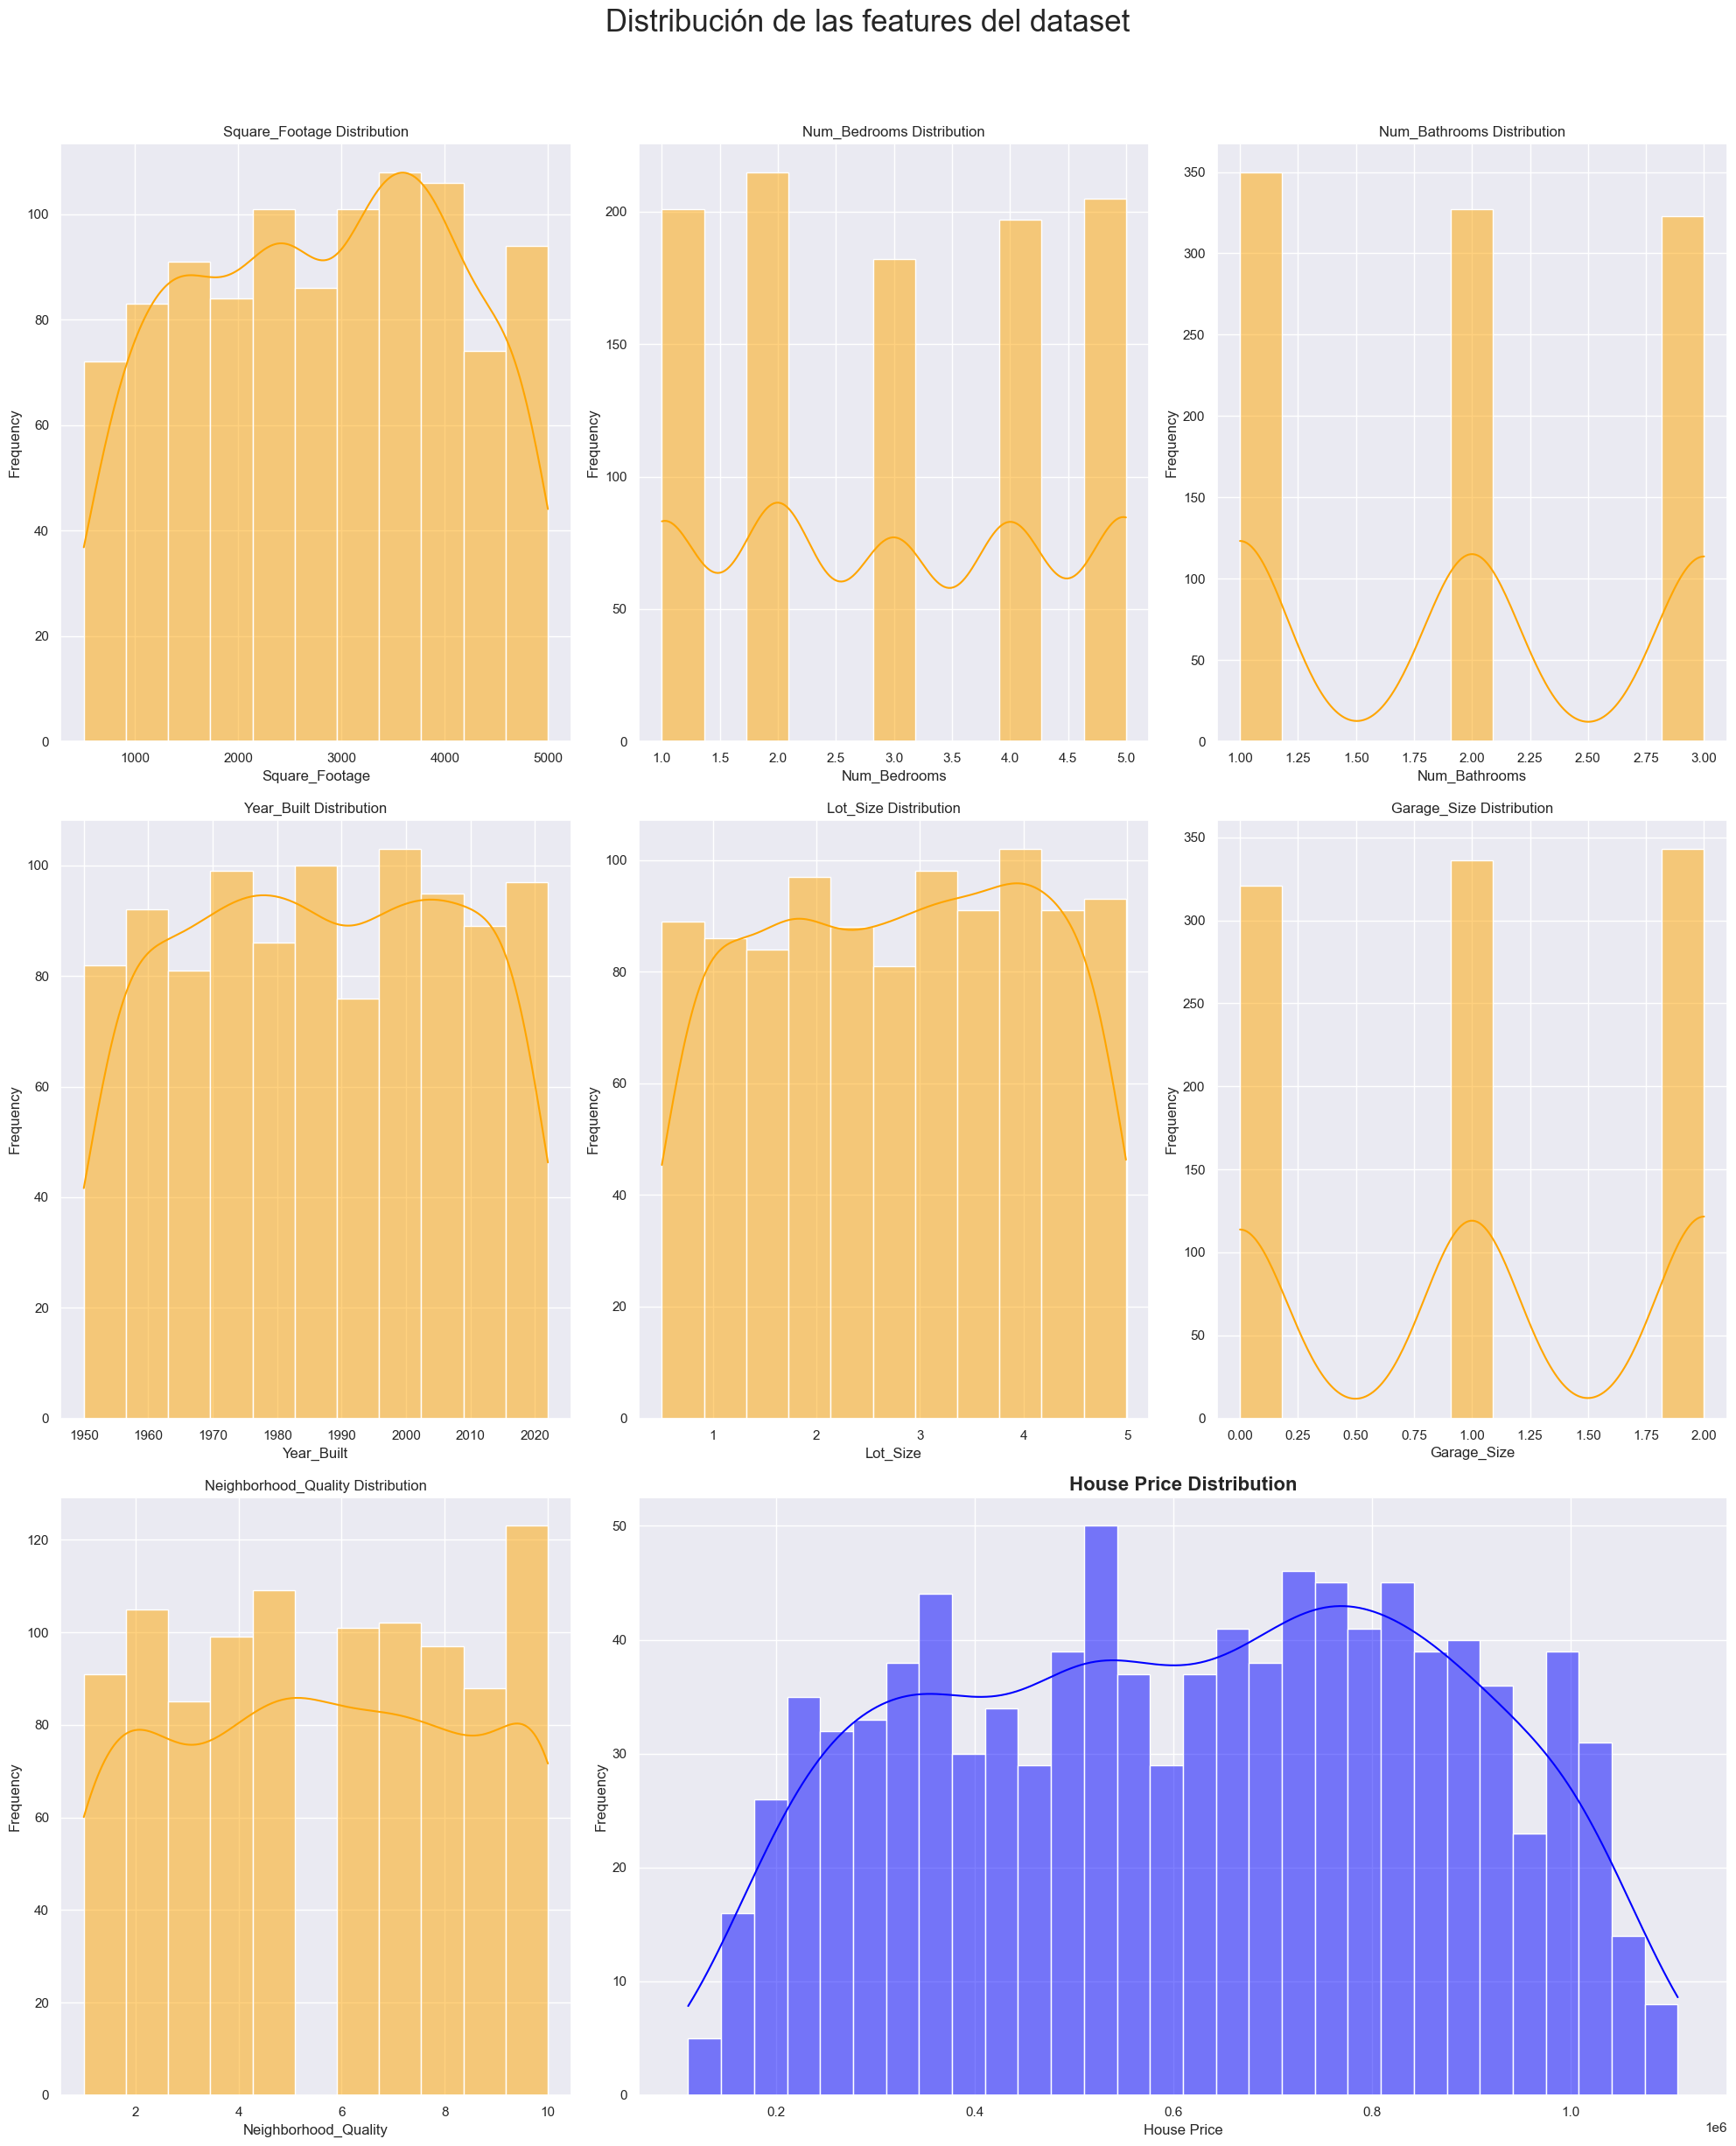

In [4]:
features = df.columns.drop('House_Price')
fig = plt.figure(figsize=(20, 25))
sns.set_theme(style="darkgrid")
gs = plt.GridSpec(3, 3, figure=fig)

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    ax = fig.add_subplot(gs[row, col])
    sns.histplot(X[feature].dropna(), color="orange", kde=True, ax=ax)
    ax.set_title(f"{feature} Distribution")
    ax.set_xlabel(feature)
    ax.set_ylabel("Frequency")
axe = fig.add_subplot(gs[2, 1:])
sns.histplot(y, color="blue", kde=True,bins=30)
axe.set_title(f"House Price Distribution", fontsize=16, fontdict={'weight': 'bold'})
axe.set_xlabel("House Price")
axe.set_ylabel("Frequency")

fig.suptitle('Distribución de las features del dataset\n\n\n', fontsize=25)
plt.tight_layout()
plt.savefig("../reports/figures/House_Pricing_and_features_histplot.svg", dpi=150)
plt.savefig("../reports/figures/House_Pricing_and_features_histplot.pdf", dpi=150)
plt.show()

By analyzing the histograms, we observed that some of the numerical variables are in fact discrete rather than continuous. Although these variables are stored as numeric values, they can be treated as categorical (qualitative) variables rather than continuous ones. This is because they represent discrete, fixed integer counts (e.g., number of bedrooms, number of bathrooms, garage spaces, or neighborhood quality rating). Unlike continuous variables such as square footage or price, these values do not capture a smooth range but rather distinct categories. For example, the difference between having 1 and 2 garages is not the same as between 2 and 3, and fractional values (like 2.5 garages) don’t make sense.

Therefore, it is often more appropriate to handle them as ordinal or categorical features, depending on the context, instead of purely numerical continuous variables.

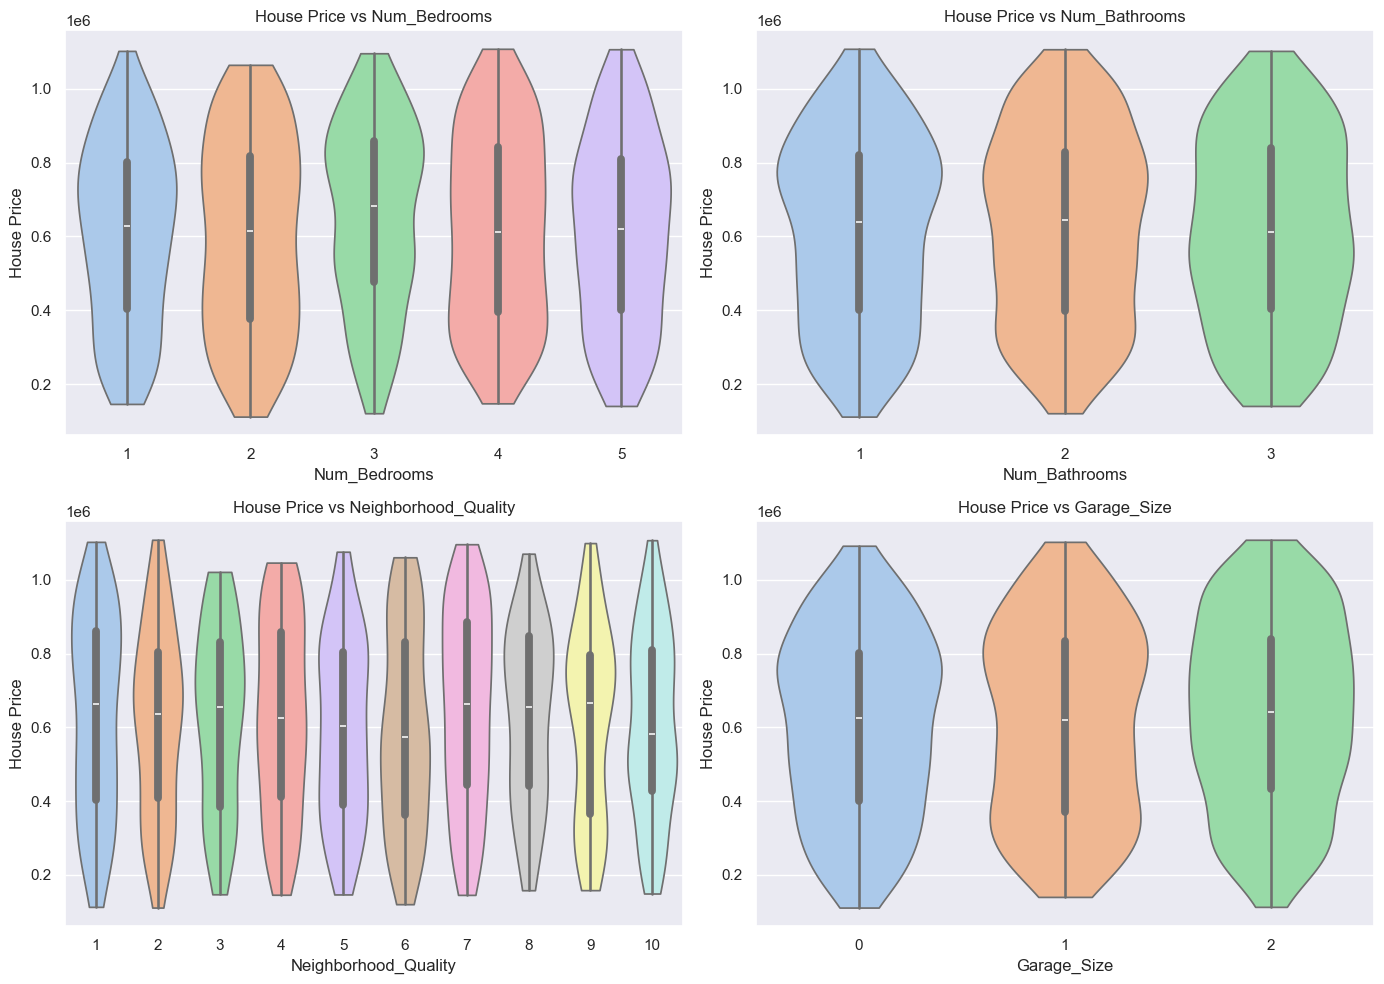

In [5]:
variables = ["Num_Bedrooms", "Num_Bathrooms", "Neighborhood_Quality", "Garage_Size"]


fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.violinplot(
        data=df,
        x=var,
        y=y,
        ax=axes[i],
        inner="box",   # añade boxplot dentro del violin
        cut=0,
        hue = var,
        palette="pastel",
        legend=False
    )
    axes[i].set_title(f"House Price vs {var}", fontsize=12)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("House Price")

plt.tight_layout()
plt.show()

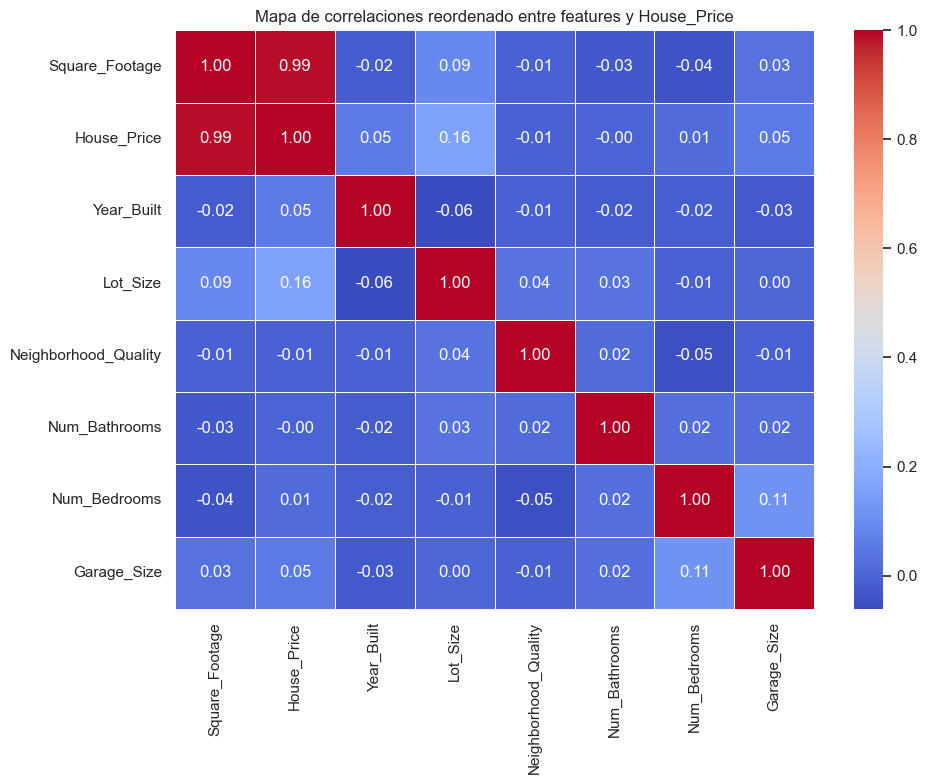

In [6]:
# Calculate the correlation matrix
corr_matrix = df.corr()
# Seaborn returns the reordered indices
cg = sns.clustermap(corr_matrix, cmap="coolwarm", linewidths=0.5, figsize=(10, 8))
ordered_indices = cg.dendrogram_row.reordered_ind
plt.close()  # close the clustermap plot to avoid displaying it

# Reorder the correlation matrix
corr_matrix = corr_matrix.iloc[ordered_indices, ordered_indices]

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.set_theme(style="white")
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Mapa de correlaciones reordenado entre features y House_Price")
plt.tight_layout()
plt.savefig("../reports/figures/House_Pricing_correlation_heatmap_ordered.svg", dpi=150)
plt.savefig("../reports/figures/House_Pricing_correlation_heatmap_ordered.pdf", dpi=150)
plt.show()

Since the clustermap revealed a strong positive correlation between House Price and Square Footage, it is appropriate to further explore this relationship with a regression plot (regplot). The regplot allows us to visualize not only the distribution of individual data points but also the linear trend between the two variables.

By plotting House Price against Square Footage with a regression line, we can:

- Confirm the strength and direction of the correlation.

- Assess whether the relationship appears linear or if there are deviations.

- Identify potential outliers that do not follow the general trend.

This visualization supports the initial correlation analysis and provides a more intuitive understanding of how increases in Square Footage are associated with increases in House Price.

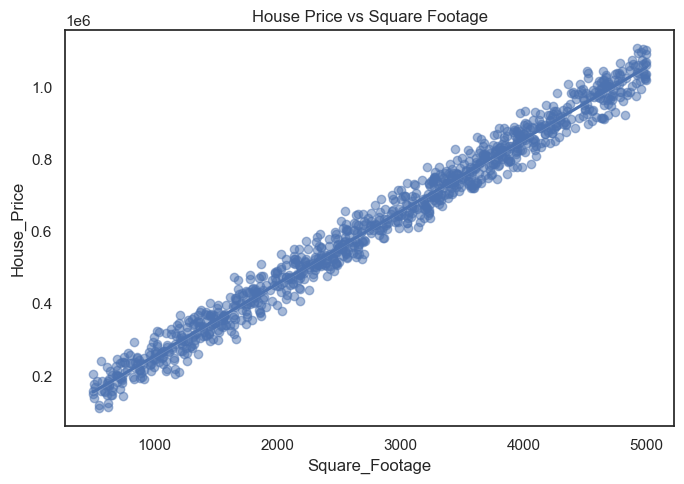

In [7]:
plt.figure(figsize=(7, 5))
sns.regplot(data=df, x="Square_Footage", y="House_Price", scatter_kws={"alpha":0.5})
plt.title("House Price vs Square Footage")
plt.tight_layout()
plt.savefig("../reports/figures/square_footage_house_price_regplot.png", dpi=150)
plt.show()
plt.close()